The code below depicts two implementations of PCA in python. The first is a step-by-step procedure. The second is using the dimensionality reduction module in scikit-learn. 

## PCA Step by Step 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd

The first step is to create some dummy data. This is done by assigning a mean (mu) and standard deviations (sigma) to create a random selection of 1000 samples with multivariate normal distribution. 

In [2]:
mu = np.array([10,13])
sigma = np.array([[3.5, -1.8], [-1.8,3.5]])

print("Mu ", mu.shape)
print("Sigma ", sigma.shape)

org_data = rnd.multivariate_normal(mu, sigma, size=(1000))
print("Data shape ", org_data.shape)

Mu  (2,)
Sigma  (2, 2)
Data shape  (1000, 2)


In [5]:
org_data[0:5,:]

array([[ 8.86914227, 16.12542843],
       [10.34381821, 11.78664376],
       [ 9.7914094 , 14.30867437],
       [ 9.33530103, 14.33119338],
       [ 9.0547715 ,  9.4241729 ]])

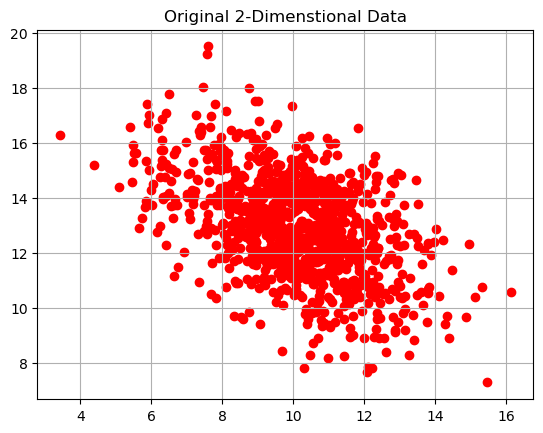

In [6]:
plt.scatter(org_data[:,0], org_data[:,1], color = 'red')
plt.title('Original 2-Dimenstional Data')
plt.grid()

In this next step we nomralize our data. This can be down in two ways. 
1. By mean centering: Mean centering is done to ensure that the first Principal Component is in the direction of maximum variance.We perform mean centering by subtracting mean from all features or channels.
2. By standardization: The calculate z as in the lecture slides. 

In [11]:
# Mean Centering
mean = np.mean(org_data, axis= 0)
mean_data = org_data - mean

[10.06898492 12.92609701]


In [13]:
# Standardization
mean = np.mean(org_data, axis= 0)
std = np.std(org_data, axis= 0)
standard_data = (org_data - mean)/std

[10.06898492 12.92609701] [1.81763447 1.84035276]


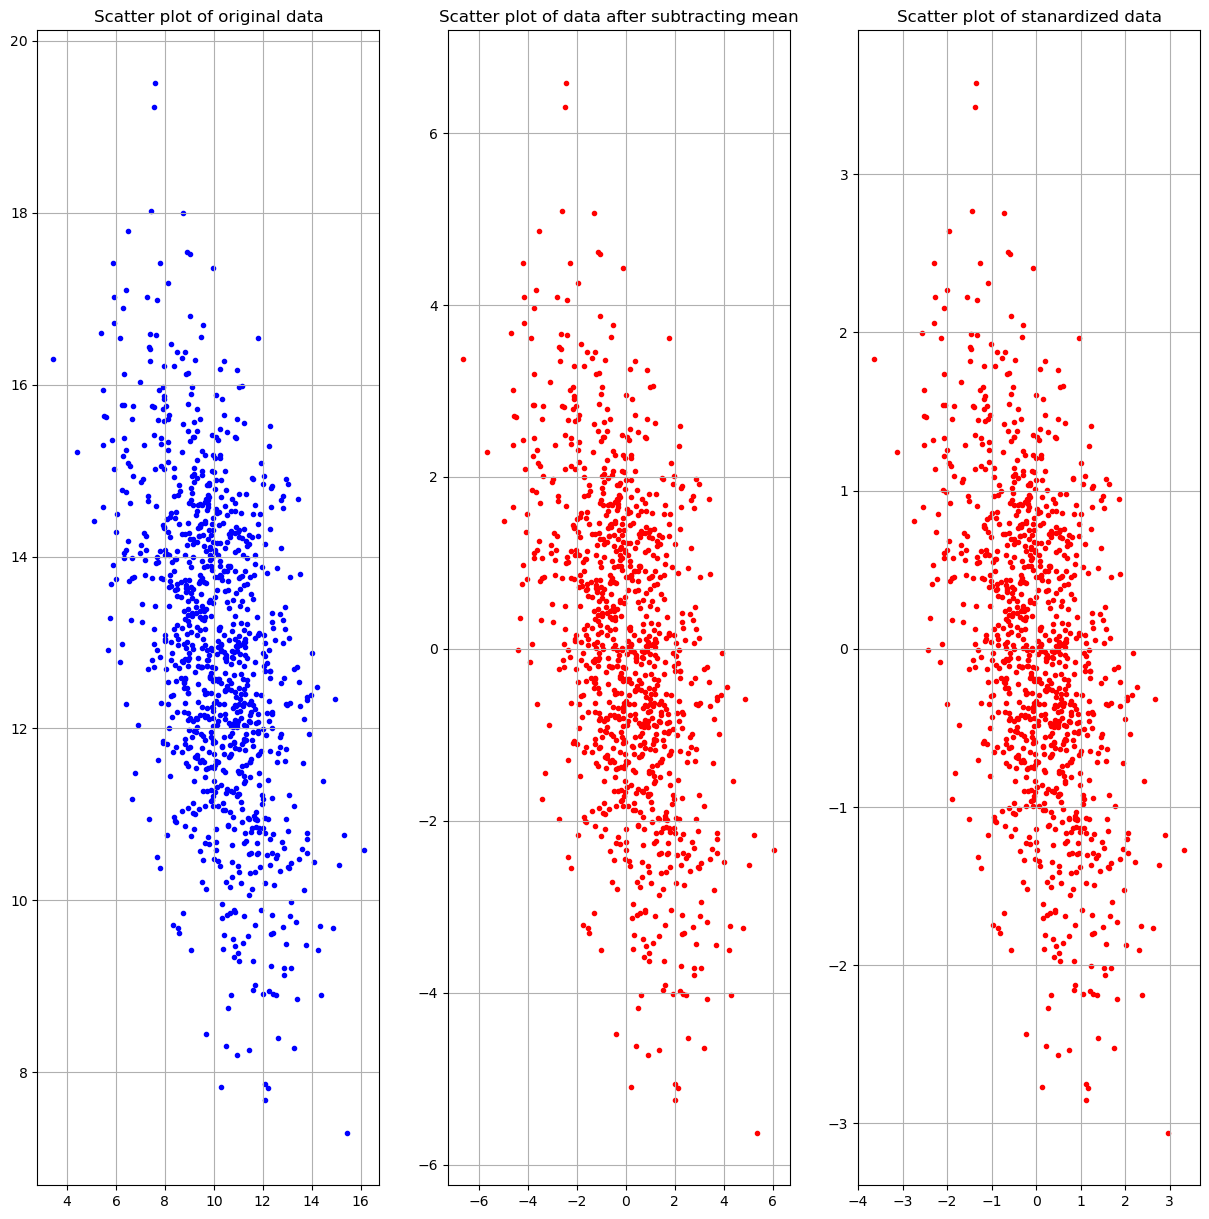

In [9]:
fig, ax = plt.subplots(1,3, figsize= (15,15))
# Plot original data
ax[0].scatter(org_data[:,0], org_data[:,1], color='blue', marker='.')

# Plot data after subtracting mean from data
ax[1].scatter(mean_data[:,0], mean_data[:,1], color='red', marker='.')

# Plot data after subtracting mean from data
ax[2].scatter(standard_data[:,0], standard_data[:,1], color='red', marker='.')

# Set title
ax[0].set_title("Scatter plot of original data")
ax[1].set_title("Scatter plot of data after subtracting mean")
ax[2].set_title("Scatter plot of stanardized data")

# Set grid to 'on'
ax[0].grid('on')
ax[1].grid('on')
ax[2].grid('on')

plt.show()
plt.close('all')

Compute the covariance matrix 

In [14]:
# Compute covariance matrix for the mean centered data
cov_mean = np.cov(mean_data.T)
cov_mean = np.round(cov_mean, 2)
print("Covariance matrix ", cov_mean, "\n")

Covariance matrix  [[ 3.31 -1.61]
 [-1.61  3.39]] 



In [15]:
# Compute covariance matrix for the standardized data
cov_stand = np.cov(standard_data.T)
cov_stand = np.round(cov_stand, 2)
print("Covariance matrix ", cov_stand, "\n")

Covariance matrix  [[ 1.   -0.48]
 [-0.48  1.  ]] 



Compute the eigen vectors of the covariance matrices 

In [16]:
# Perform eigen decomposition of covariance matrix
eig_val, eig_vec = np.linalg.eig(cov_mean)
print("Eigen vectors ", eig_vec)
print("Eigen values ", eig_val, "\n")

Eigen vectors  [[-0.71583415  0.69827034]
 [-0.69827034 -0.71583415]]
Eigen values  [1.73950318 4.96049682] 



In [17]:
indices = np.arange(0,len(eig_val), 1)
indices = ([x for _,x in sorted(zip(eig_val, indices))])[::-1]
eig_val = eig_val[indices]
eig_vec = eig_vec[:,indices]
print("Sorted Eigen vectors ", eig_vec)
print("Sorted Eigen values ", eig_val, "\n")

Sorted Eigen vectors  [[ 0.69827034 -0.71583415]
 [-0.71583415 -0.69827034]]
Sorted Eigen values  [4.96049682 1.73950318] 



Compute the explained variance 

In [18]:
sum_eig_val = np.sum(eig_val)
explained_variance = eig_val/ sum_eig_val
print(explained_variance)
cumulative_variance = np.cumsum(explained_variance)
print(cumulative_variance)


[0.74037266 0.25962734]
[0.74037266 1.        ]


The Cumulative % column gives the percentage of variance accounted for by the first n components. For example, the cumulative percentage for the second component is the sum of the percentage of variance for the first and second components.

Our next step is to transform the data using the eigen vectors 

In [19]:
pca_data = np.dot(mean_data, eig_vec)
print("Transformed data ", pca_data.shape)

Transformed data  (1000, 2)


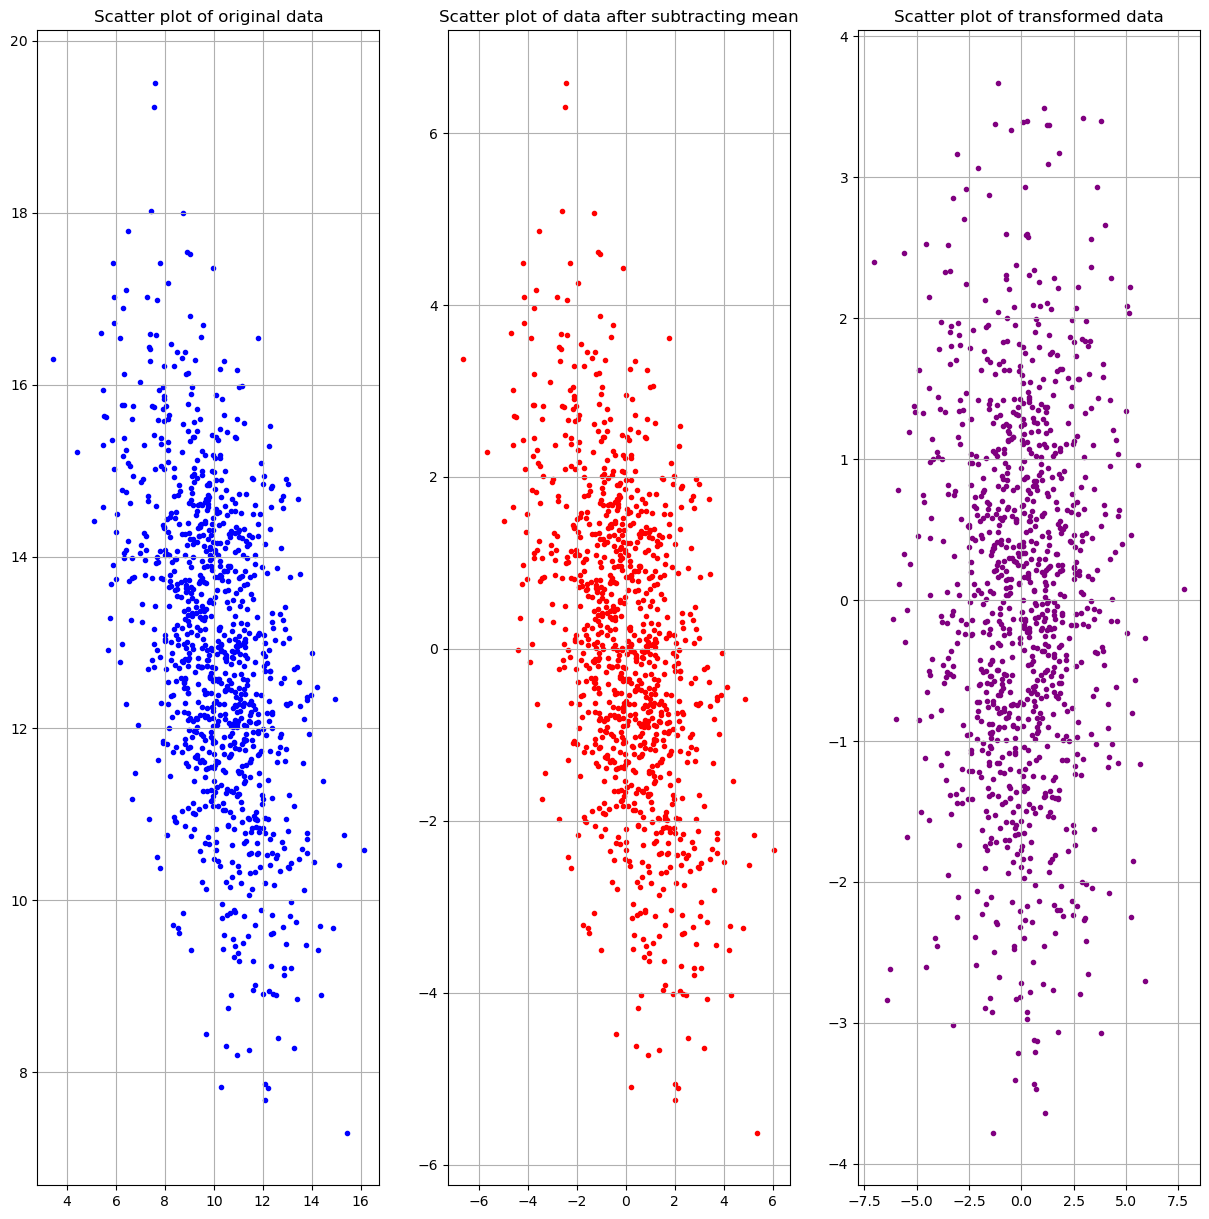

In [20]:
fig, ax = plt.subplots(1,3, figsize= (15,15))

# Plot original data
ax[0].scatter(org_data[:,0], org_data[:,1], color='blue', marker='.')

# Plot data after subtracting mean from data
ax[1].scatter(mean_data[:,0], mean_data[:,1], color='red', marker='.')

# Plot data after subtracting mean from data
ax[2].scatter(pca_data[:,0], pca_data[:,1], color='purple', marker='.')

# Set title
ax[0].set_title("Scatter plot of original data")
ax[1].set_title("Scatter plot of data after subtracting mean")
ax[2].set_title("Scatter plot of transformed data")

# Set grid to 'on'
ax[0].grid('on')
ax[1].grid('on')
ax[2].grid('on')

plt.show()
plt.close('all')

In the scatter plot, we can see that after PCA, the y-axis is the direction of maximum variance. 

In this last step, we invert the PCA and Reconstruct from N components. In this case we are using two components. 

In [21]:
# Reverse PCA transformation
recon_data = pca_data.dot(eig_vec.T) + mean
print(recon_data.shape)

(1000, 2)


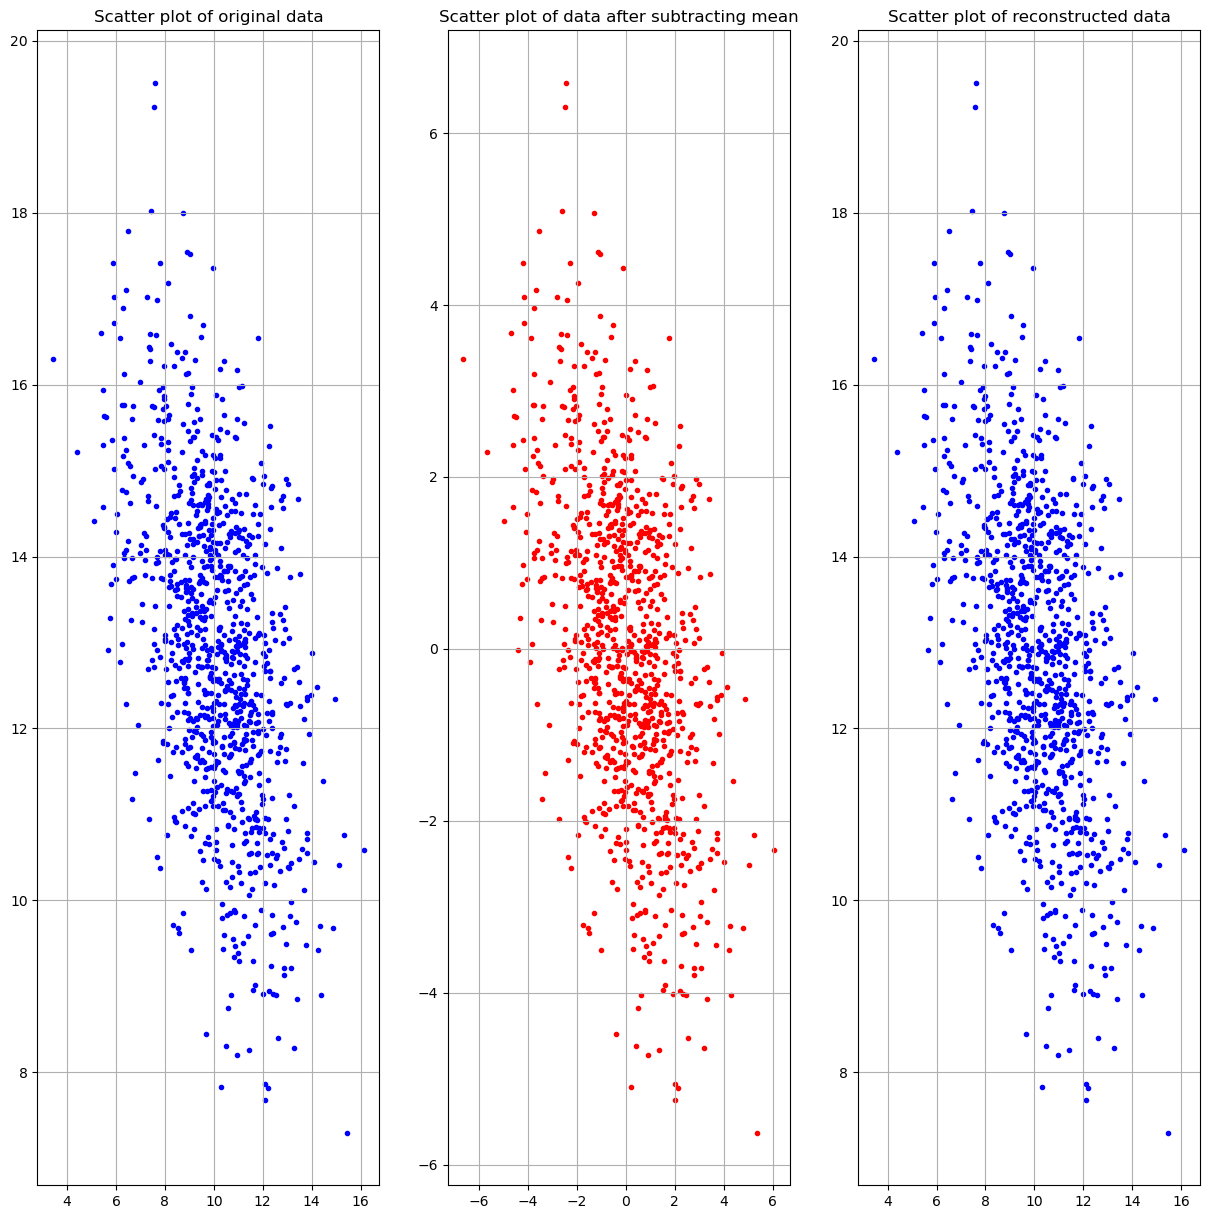

In [22]:
fig, ax = plt.subplots(1,3, figsize= (15, 15))
ax[0].scatter(org_data[:,0], org_data[:,1], color='blue', marker='.')
ax[1].scatter(mean_data[:,0], mean_data[:,1], color='red', marker='.')
ax[2].scatter(recon_data[:,0], recon_data[:,1], color='blue', marker='.')
ax[0].set_title("Scatter plot of original data")
ax[1].set_title("Scatter plot of data after subtracting mean")
ax[2].set_title("Scatter plot of reconstructed data")
ax[0].grid('on')
ax[1].grid('on')
ax[2].grid('on')
plt.show()

We then compute the reconstruction loss. 

In [23]:
# Compute reconstruction loss
loss = np.mean(np.square(recon_data - org_data))
print("Reconstruction loss ", loss)

Reconstruction loss  5.403697200763931e-32


Here we have a VERY low loss. Which is to be expected! 

## PCA in Scikit-Learn

In [24]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [25]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

df = pd.read_csv(url, names=['sepal length', 'sepal width' , 'petal length', 'petal width', 'target'])

In [26]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
from sklearn.preprocessing import StandardScaler

features = ['sepal length', 'sepal width', 'petal length', 'petal width']

x = df.loc[:, features].values

y = df.loc[:, ['target']].values

x = StandardScaler().fit_transform(x)

We then perform PCA we would use PCA module from sklearn which we have already imported in Step 1. Below, the first and the  line performs the PCA, the third line loads the principal components into a dataframe. You can view your data by typing principalComponents or principalDataframe in a cell and running it.

In [28]:
pca = PCA(n_components=4)

principalComponents = pca.fit_transform(x)

principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2',  'PC3', 'PC4'])

Remember that the original data has five columns: four features and one target column. Now after performing PCA, we have just two columns for the features. The target dataset y was not touched. Therefore, we attached back the target column to the new set of principal components. To do that, use the code below.

In [29]:
targetDataframe = df[['target']]

newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)

A scree plot is like a bar chart showing the size of each of the principal components. It helps us to visualize the percentage of variation captured by each of the principal components.

[72.77 23.03  3.68  0.52]


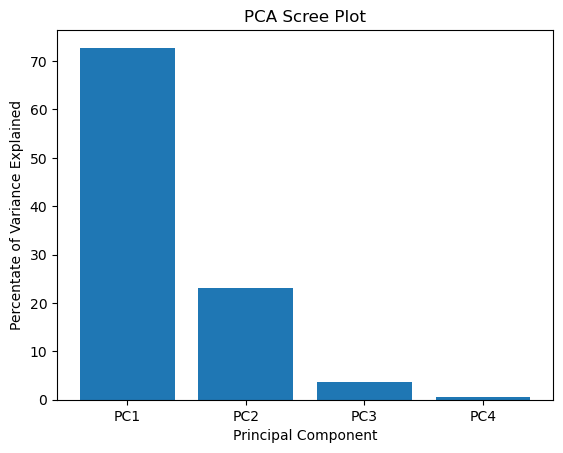

In [30]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
print(percent_variance)
columns = ['PC1', 'PC2', 'PC3', 'PC4']
plt.bar(x= range(1,5), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

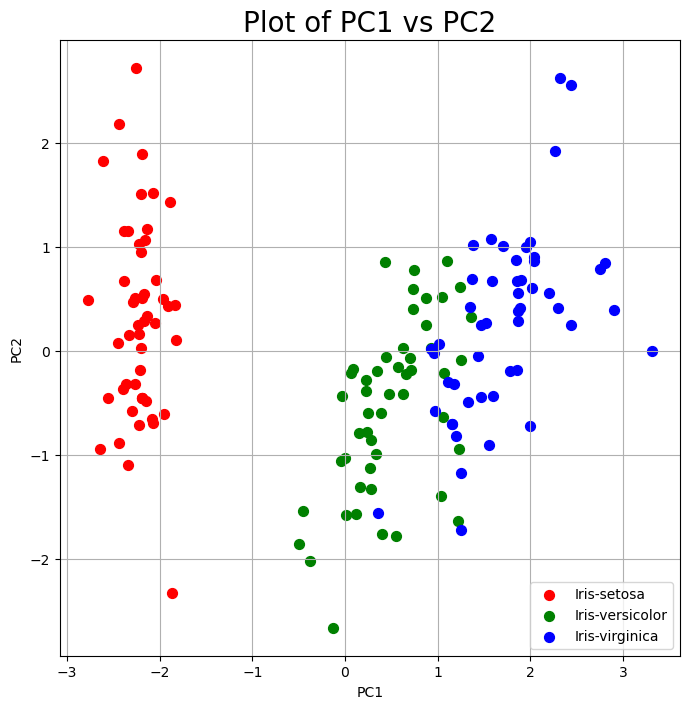

In [31]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.set_title('Plot of PC1 vs PC2', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = newDataframe['target'] == target
    ax.scatter(newDataframe.loc[indicesToKeep, 'PC1']
               , newDataframe.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
    
ax.legend(targets)
ax.grid()

Compute the explained variance 

In [32]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

In conclusion, this means that the original 4 dimensional data can be safely reduced to 2 dimensions using PCA because the dataset can be explained by only two components!